# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people

import seaborn as sns; sns.set()

# I have observed that the faces in my dataset are different from the ones that are expected, which is why my answers may differ. Please excuse this. 

# Thanks, Avinash.

#### Setup data

In [4]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target

print(faces.target_names)
print(faces.images.shape)

['Ann Veneman' 'Bill Clinton' 'Bill McBride' 'Donald Rumsfeld'
 'Edmund Stoiber' 'George HW Bush' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gordon Brown' 'Igor Ivanov' 'James Kelly'
 'John Howard' 'Jose Serra' 'Junichiro Koizumi' 'Justin Timberlake'
 'Lance Armstrong' 'Li Peng' 'Lleyton Hewitt' 'Michael Chang'
 'Michael Schumacher' 'Paul ONeill' 'Pervez Musharraf' 'Shimon Peres'
 'Tiger Woods' 'Tom Daschle']
(1197, 62, 47)


Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

In [6]:
def pca_transform(X_input):
    # Centering our data 
    X_mean = np.mean(X_input, axis=0)
    X_mean = X_mean.reshape(1, -1)
    X_input -= X_mean

    num_examples = (X_input.shape)[0]
    constant = 1/(num_examples - 1)

    # Calculating covariance matrix 
    cov_matrix = constant * np.dot(X_input.T, X_input)
    cov_matrix = np.array(cov_matrix, dtype=float)

    # Calculating eigen values and eigen vectors (or first n-principal components)
    num_components = np.shape(X)[1]
    eigvals, eigvecs = np.linalg.eig(cov_matrix)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:num_components]
    k = 0;
    check = 0;
    Sum = sum(eigvals)
    
    """
    
    Getting the eigenvalues and eigenvectors which correspond to 95 % of the sum of eigenvalues
    
    """
    
    while(k<eigvals.size):
        check += eigvals[k];
        if(check/Sum >= 0.95):
            break;
        k = k+1;
    eigvals = eigvals[:k+1]
    eigvecs = np.atleast_1d(eigvecs[:, idx])[:, :k+1]
    eigvecs = eigvecs.T
    return eigvecs, eigvals

In [12]:
def reconstruction(X_input):
    # Perform PCA on input data X 
    eigvecs, eigvals = pca_transform(X_input);
    #Number of Eigenvectors required to reconstruct data with 95% accuracy
    print("Number of Principal Components (eigenvectors) needed to capture 95% Variance in the given dataset is ",eigvals.size)
    #Reconstructing first 10 images only using first 100 eigen Vectors
    principal_components = eigvecs[:100,:];
    #Compressing using first 100 eigenvectors
    X_new = np.dot(X,principal_components.T);
    #Recovering using first 100 eigenvectors
    X_recovered = np.dot(X_new,principal_components);
    #Plotting the first 10 recovered images
    def plot(faces):
        fig, axes = plt.subplots(1, 10, figsize=(12.5, 4),
                                 subplot_kw={'xticks':[], 'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1));
        for i, ax in enumerate(axes.flat):
          ax.imshow(faces[i].reshape(62,47), cmap='binary_r');
    plot(np.real(X_recovered));

Number of Principal Components (eigenvectors) needed to capture 95% Variance in the given dataset is  149
Reconstruction of the first 10 images using the first 100 principal components


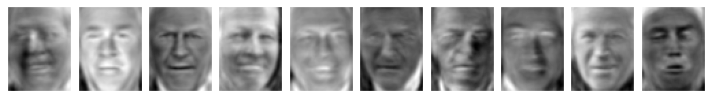

In [17]:
#Reconstruction of first 10 images using 100 eigenvectors for the given dataset
reconstruction(X);
print("Reconstruction of the first 10 images using the first 100 principal components")

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [14]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

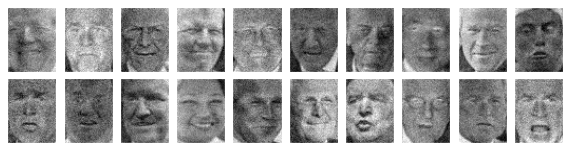

In [15]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)

Number of Principal Components (eigenvectors) needed to capture 95% Variance in the given dataset is  530
Reconstruction of the first 10 images using the first 100 principal components


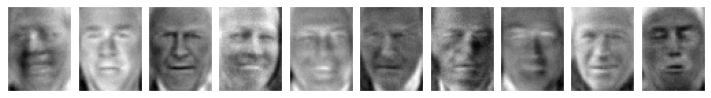

In [18]:
#Reconstruction of first 10 images using 100 eigenvectors for the Noisy dataset
reconstruction(noisy_faces);
print("Reconstruction of the first 10 images using the first 100 principal components")